In [24]:
#IMportação das bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#1-Preparação dos dados
#Importando a base de dados
data = pd.read_csv('dados_produtos.csv')

In [26]:
#Verificando os dados da base de dados
data.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [27]:
#2- Exploração dos dados
#Criando o dataframe
df_produtos = pd.DataFrame(data)

In [28]:
df_produtos # Exibe os valores

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
...,...,...,...,...
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1


In [29]:
df_produtos.info() #exibe informações sobre o novo dataframe criado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [30]:
#Vendo as informações do dataframe
df_produtos.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


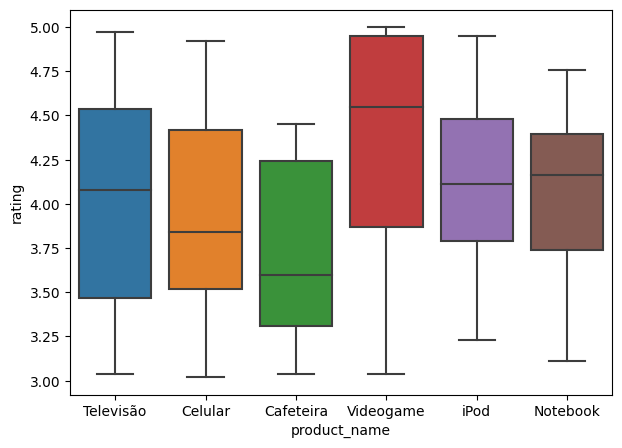

In [31]:
#Plotando o boxplot
plt.figure(figsize=(7, 5)) #Definindo o tamanho da figura
sns.boxplot(x='product_name', y='rating', data=df_produtos) #Passando o parãmetro do boxplot
plt.xlabel('product_name') #Dando um titulo para a coluna x
plt.ylabel('rating')#Dando um titulo para a coluna y
plt.show() #Mostrando o boxplot


In [32]:
#3- Pré processamento dos dados
#Verificar valores ausentes
print(df_produtos.isnull().sum())

# Preencher valores ausentes com a média nos campos que precisam de numeros
df_produtos['rating'].fillna(df_produtos['rating'].mean(), inplace=True) #A funcao fillna preenche valores vazios e o mean calcula a media dos valores
df_produtos['rating_count'].fillna(df_produtos['rating_count'].median(), inplace=True) #A funcao median calcula a mediana

#Inplace True é quando não precisamos usar o objeto
#Inplace False é quando precisamos manter o objeto sem que ele perca dados

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


In [33]:
# Codificação para a variável categórica
# Aplicando o get_dummies
df_dummies = pd.get_dummies(data, columns=['product_name'], drop_first=True)
#Get dummmies serve para converter variaveis de categoria para variaveis numericas
#Drop firts descarta a primeira coluna para simplificar o modelo

# Ver o dataframe apos o processo
print(df_dummies.head())#Exibe as 5 primeiras linhas do dataframe


   rating  rating_count  purchased  product_name_Celular  \
0    3.04            29          1                 False   
1    3.46          3872          0                  True   
2    3.25          1187          0                 False   
3    3.77          4097          1                 False   
4    5.00          4738          1                 False   

   product_name_Notebook  product_name_Televisão  product_name_Videogame  \
0                  False                    True                   False   
1                  False                   False                   False   
2                  False                   False                   False   
3                  False                    True                   False   
4                  False                   False                    True   

   product_name_iPod  
0              False  
1              False  
2              False  
3              False  
4              False  


In [34]:
# Verificando as colunas criadas
print("Colunas disponíveis após get_dummies:")
print(df_dummies.columns.tolist())

Colunas disponíveis após get_dummies:
['rating', 'rating_count', 'purchased', 'product_name_Celular', 'product_name_Notebook', 'product_name_Televisão', 'product_name_Videogame', 'product_name_iPod']


In [35]:
# Importar a biblitoeca para a arvpre de decisao
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Definindo X e Y
X = df_dummies[['rating', 'rating_count'] + [col for col in df_dummies.columns if 'product_name_' in col]]
y = df_dummies['purchased']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo e treinando
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)


In [37]:
print("Colunas de treinamento:", X_train.columns)
print("Colunas de teste:", X_test.columns)


Colunas de treinamento: Index(['rating', 'rating_count', 'product_name_Celular',
       'product_name_Notebook', 'product_name_Televisão',
       'product_name_Videogame', 'product_name_iPod'],
      dtype='object')
Colunas de teste: Index(['rating', 'rating_count', 'product_name_Celular',
       'product_name_Notebook', 'product_name_Televisão',
       'product_name_Videogame', 'product_name_iPod'],
      dtype='object')


In [38]:
# Criando um modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

In [39]:
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
#Importando as bibliotecas faltantes
from sklearn.metrics import recall_score, f1_score

In [41]:
# Previsões
y_pred = model.predict(X_test)

In [42]:
# Avaliação
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Matriz de Confusão:\n", conf_matrix)
print("Acurácia:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Matriz de Confusão:
 [[2 3]
 [9 6]]
Acurácia: 0.4
Recall: 0.4
F1 Score: 0.5


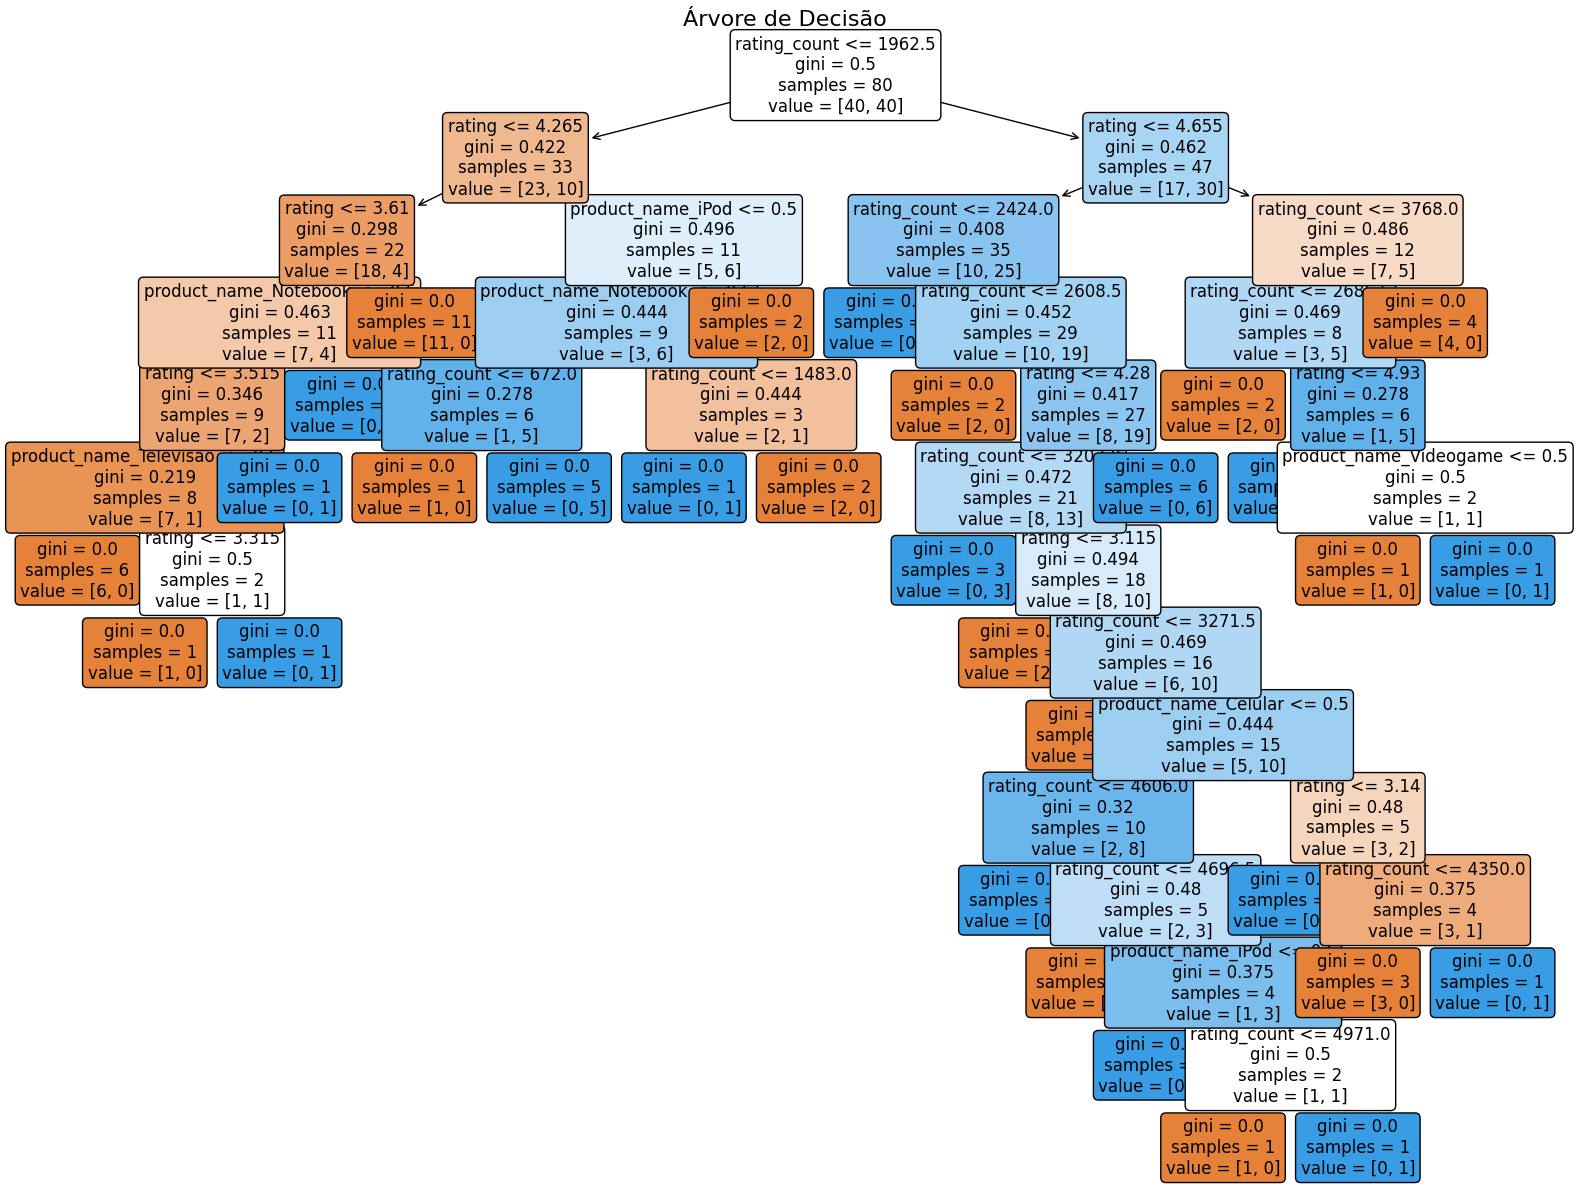

In [43]:
from sklearn.tree import plot_tree

# Aumentando o tamanho da figura e a resolução
plt.figure(figsize=(20, 15))  # Aumentando o tamanho
plot_tree(model, filled=True, feature_names=X.columns.tolist(), rounded=True, fontsize=12)
plt.title('Árvore de Decisão', fontsize=16)
plt.show()


In [44]:
#9- Conclusão
#Fazendo as conclusões com base nas métricas
if accuracy > 0.75:
    print("O modelo é eficaz para prever as compras dos consumidores com base nas avaliações.")
else:
    print("O modelo precisa de melhorias.")


O modelo precisa de melhorias.


In [45]:
# Verificando os produtos únicos na coluna 'product_name'
print("Produtos únicos na coluna 'product_name':")
print(data['product_name'].unique())

Produtos únicos na coluna 'product_name':
['Televisão' 'Celular' 'Cafeteira' 'Videogame' 'iPod' 'Notebook']


In [46]:
# Lista de produtos a serem utilizados com base nas colunas disponíveis
produtos = ['product_name_Celular', 'product_name_Notebook', 
            'product_name_Televisão', 'product_name_Videogame', 
            'product_name_iPod', 'product_name_Cafeteira'] 


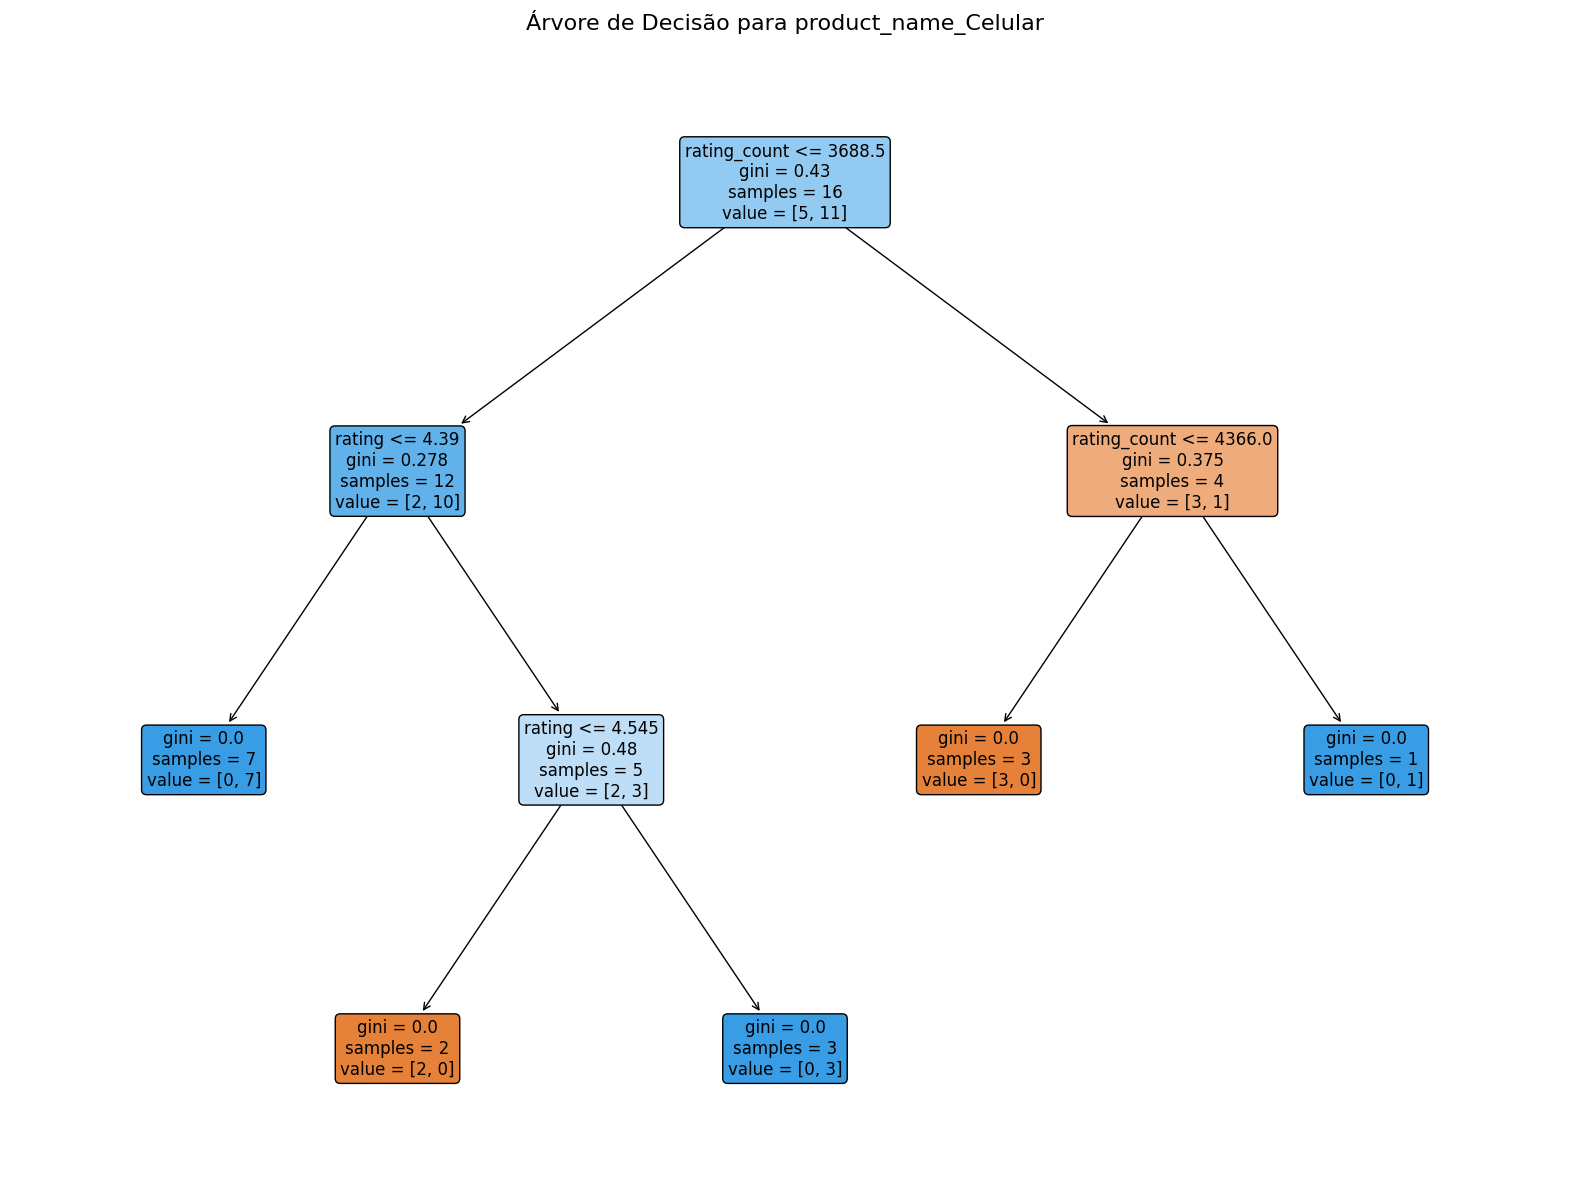

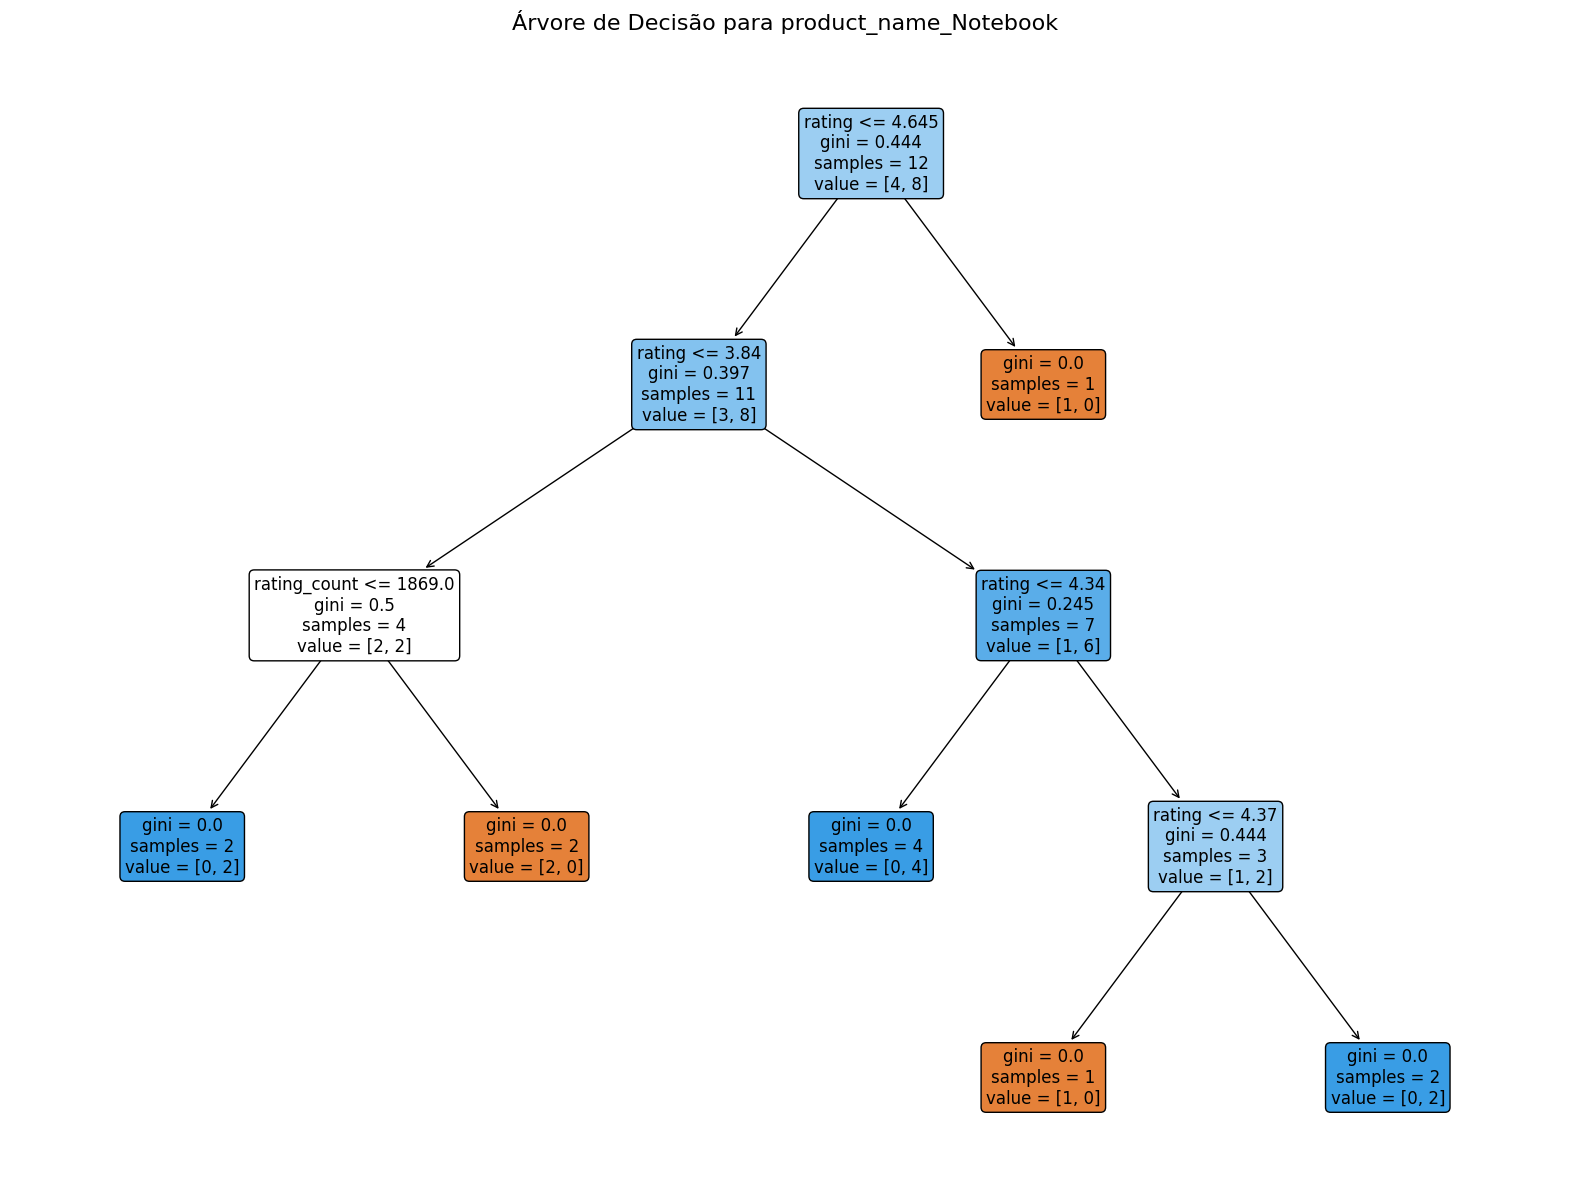

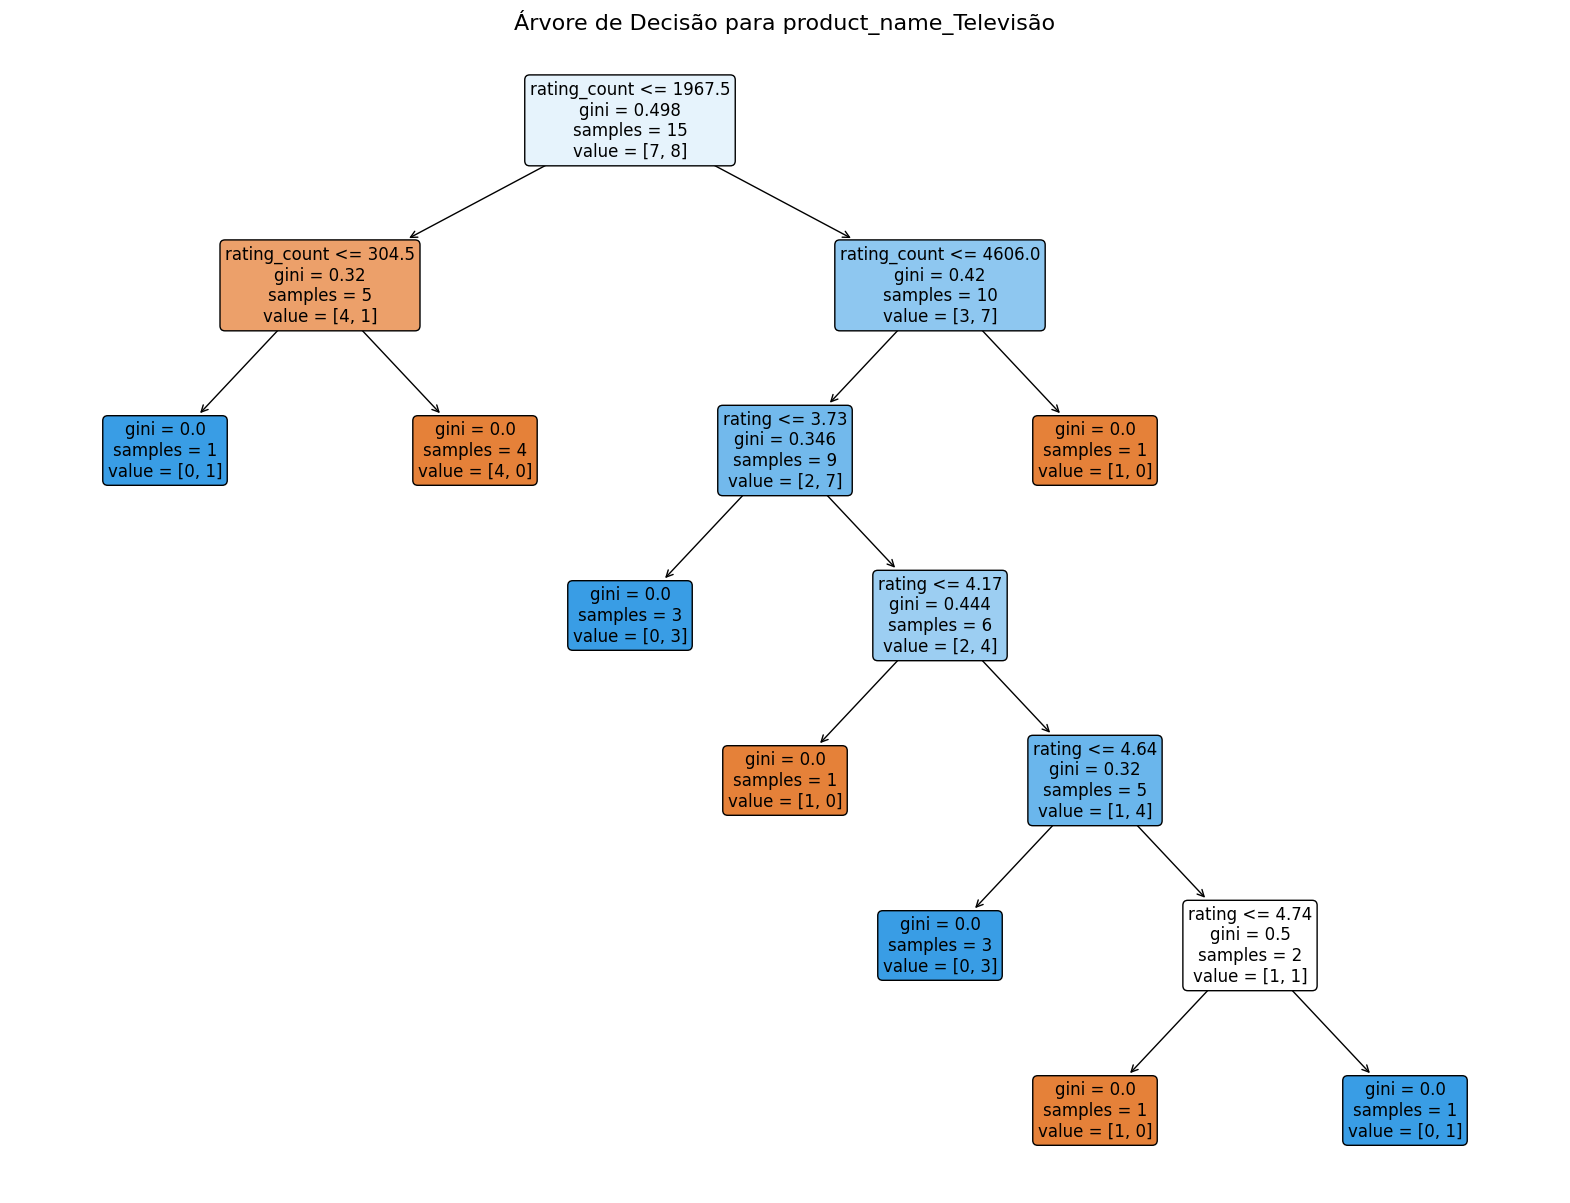

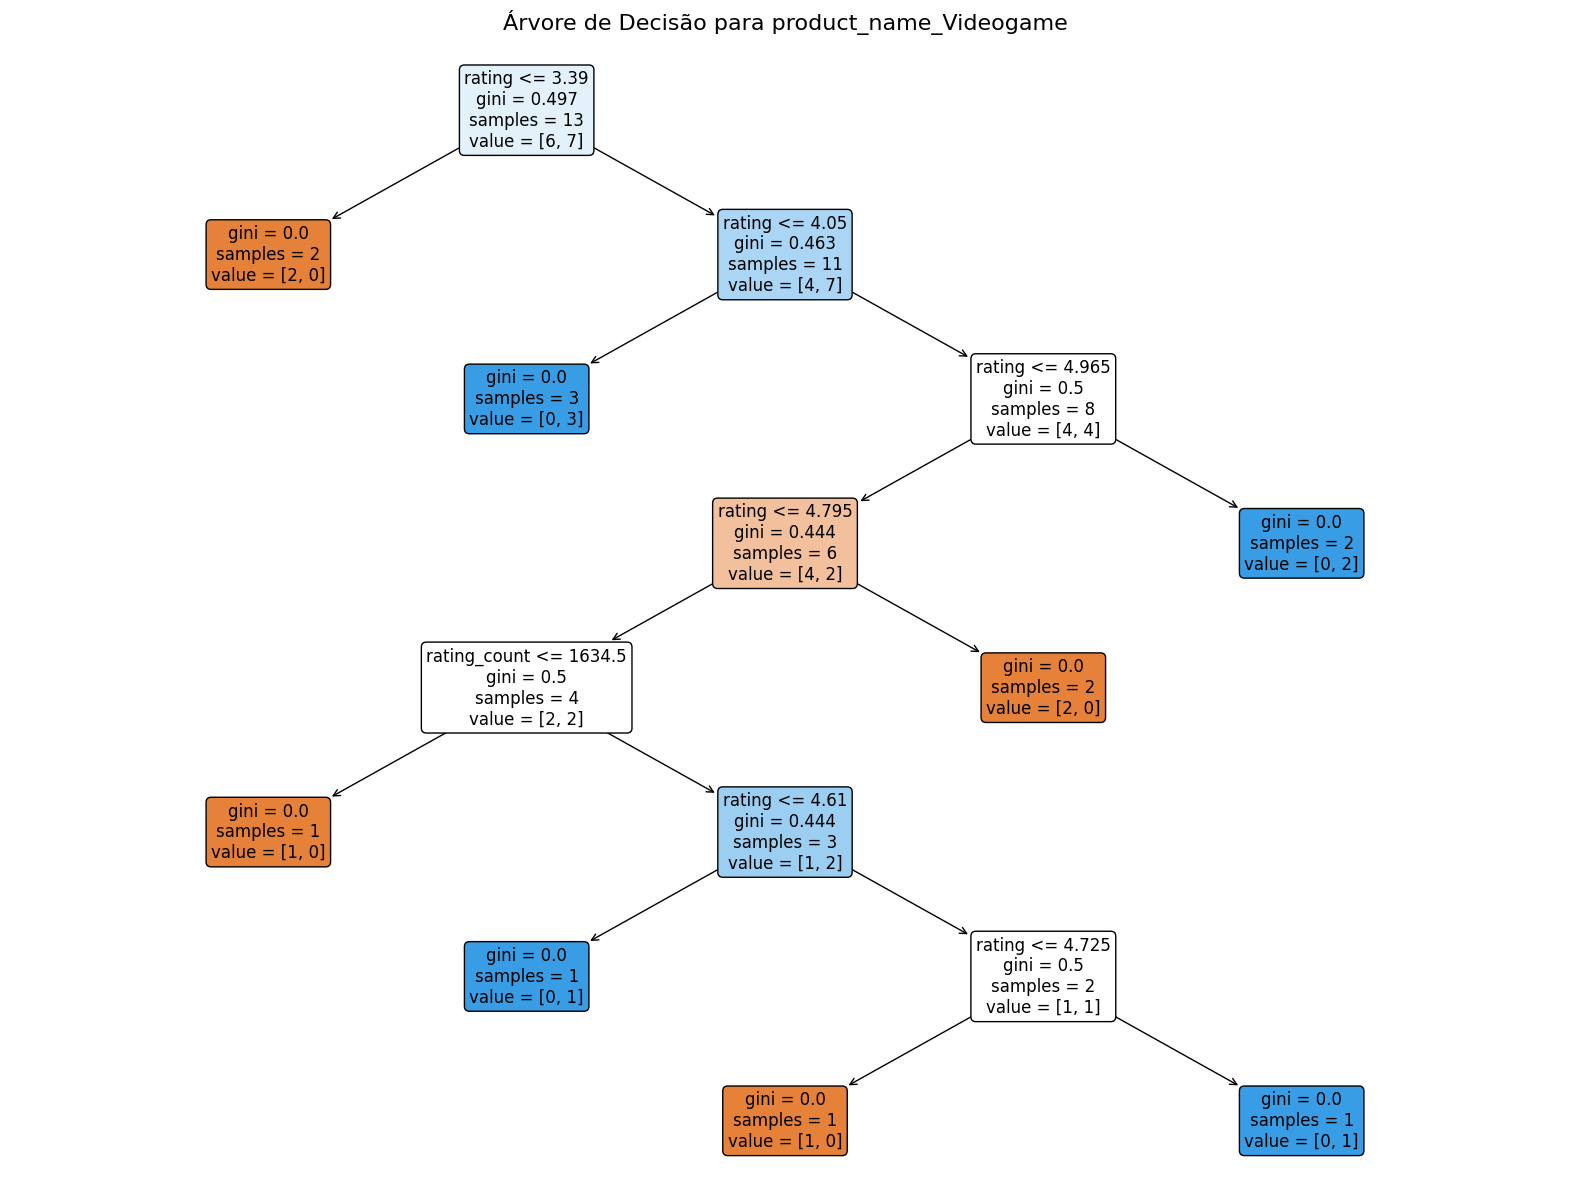

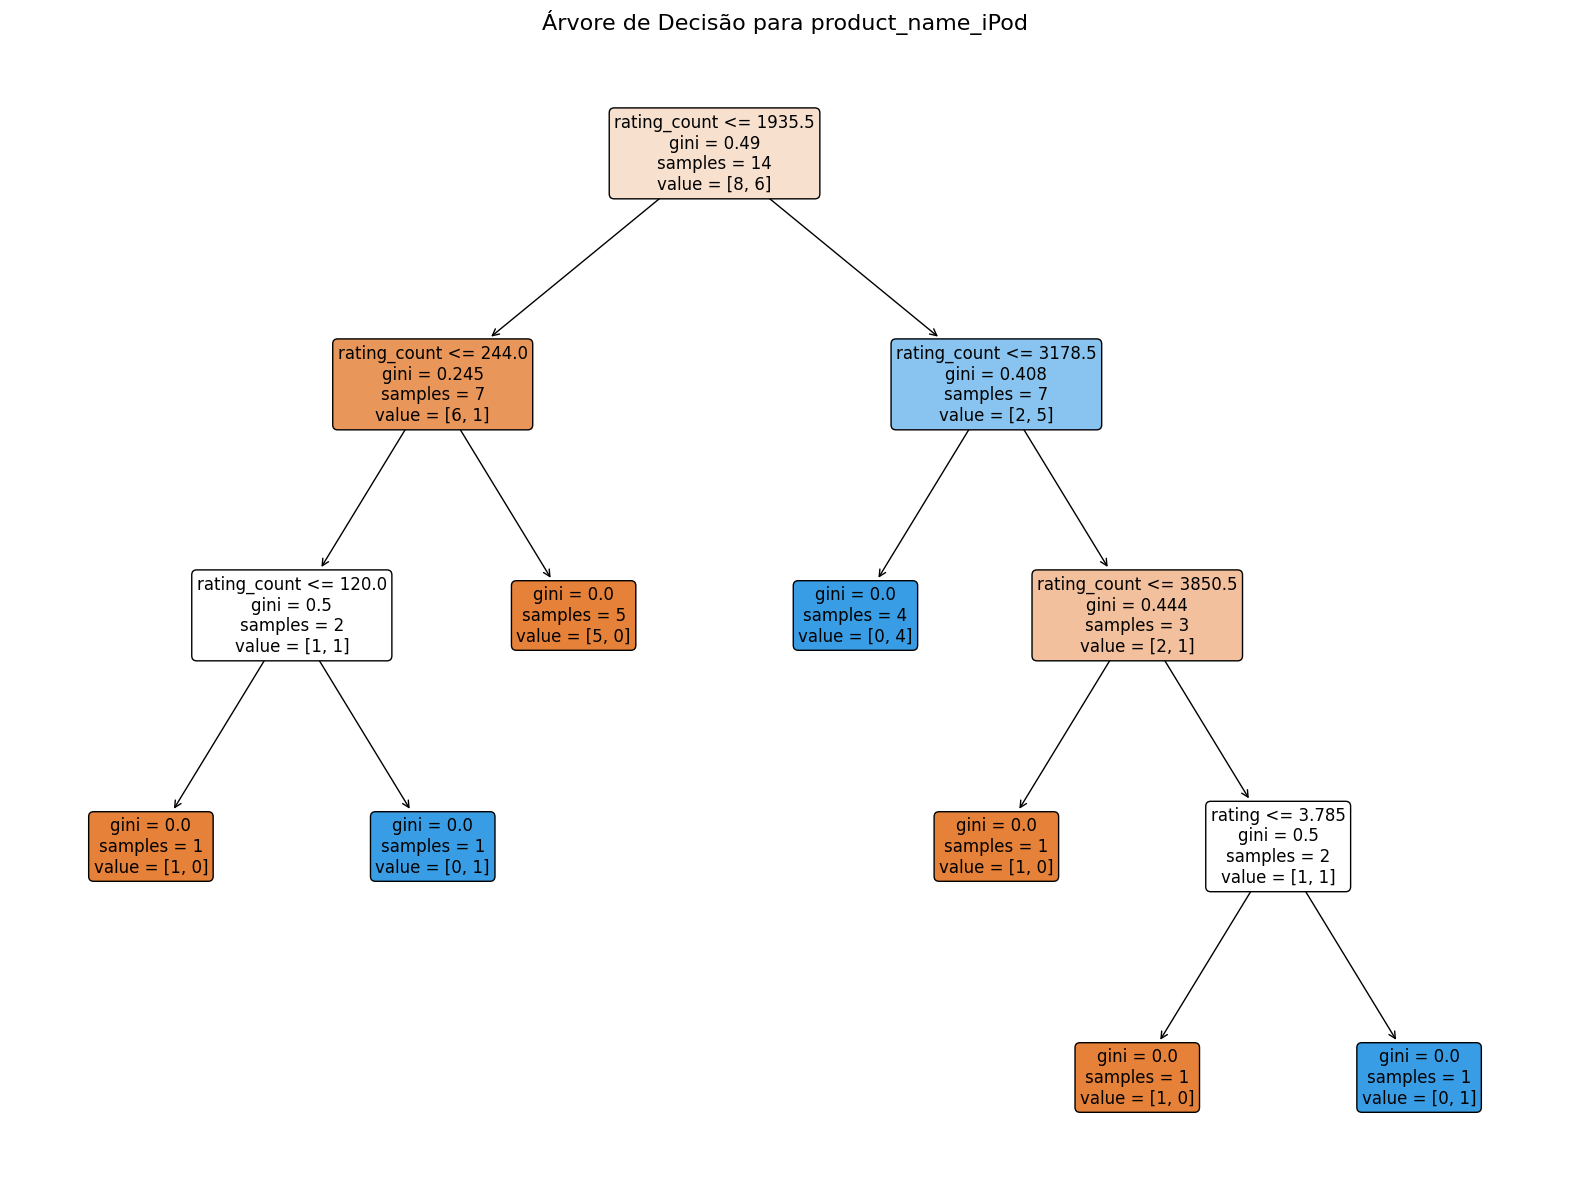

KeyError: 'product_name_Cafeteira'

In [47]:
# Loop para criar e visualizar a árvore de decisão para cada produto
for produto in produtos:
    # Filtrando os dados para o produto atual
    df_produto = df_dummies[df_dummies[produto] == 1]
    
    # Verificando se há dados suficientes
    if len(df_produto) < 2:
        print(f"Não há dados suficientes para o produto: {produto}")
        continue

    # Preparando as variáveis de entrada e saída
    X = df_produto[['rating', 'rating_count']]
    y = df_produto['purchased']
    
    # Dividindo os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criando e treinando o modelo
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Plotando a árvore de decisão
    plt.figure(figsize=(20, 15))
    plot_tree(model, filled=True, feature_names=X.columns.tolist(), rounded=True, fontsize=12)
    plt.title(f'Árvore de Decisão para {produto}', fontsize=16)
    plt.show()